# Projeto 1 - Acertar o tipo de flor da espécie Iris

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img1.png?raw=true" width="500" height="100"/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from plotnine import *
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fgiordanelli/Projeto1/main/Datasets/dataset1.csv")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


## Ver o balanceamento da base de dados
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img2.png?raw=true" width="500" height="100"/>

In [5]:
total = df.groupby('species').agg(n = ('species','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [6]:
total

,species,n,perc
0,setosa,50,50.0
1,versicolor,50,50.0


## Ver se tem valores fora do padrão
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img3.png?raw=true" width="300" height="100"/>

<AxesSubplot:>

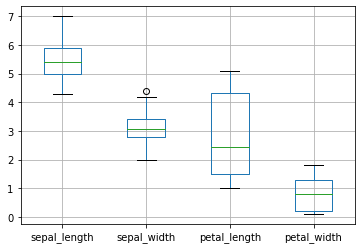

In [7]:
df.boxplot()

## Separar em target e feature

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img12.png?raw=true" width="300" height="100"/>

In [7]:
X = df.drop(columns = ['species'])
y = df['species']

## Separar em treino e teste e a variável target das features
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img8.png?raw=true" width="250" height="80"/>

In [9]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)
CART = DecisionTreeClassifier(min_samples_leaf=10).fit(X_train, y_train)
KNN = KNeighborsClassifier().fit(X_train, y_train)
SVM = SVC(probability=True).fit(X_train, y_train) 
RF = RandomForestClassifier().fit(X_train, y_train)

# Como funciona?

In [10]:
X_train2 = X_train.copy()
X_train2['probabilidade LR'] = LR.predict_proba(X_train)[:,1]
X_train2['probabilidade SVM'] = SVM.predict_proba(X_train)[:,1]
X_train2['cutoff / threshold'] = 0.5
X_train2['predito LR'] = LR.predict(X_train)
X_train2['predito SVM'] = SVM.predict(X_train)
X_train2

,sepal_length,sepal_width,petal_length,petal_width,probabilidade LR,probabilidade SVM,cutoff / threshold,predito LR,predito SVM
28,5.2,3.4,1.4,0.2,0.027948,0.025111,0.5,setosa,setosa
93,5.0,2.3,3.3,1.0,0.885142,0.938029,0.5,versicolor,versicolor
5,5.4,3.9,1.7,0.4,0.045435,0.042364,0.5,setosa,setosa
66,5.6,3.0,4.5,1.5,0.991455,0.984987,0.5,versicolor,versicolor
65,6.7,3.1,4.4,1.4,0.992200,0.972134,0.5,versicolor,versicolor
...,...,...,...,...,...,...,...,...,...
60,5.0,2.0,3.5,1.0,0.937784,0.964805,0.5,versicolor,versicolor
71,6.1,2.8,4.0,1.3,0.979818,0.976755,0.5,versicolor,versicolor
14,5.8,4.0,1.2,0.2,0.014736,0.018522,0.5,setosa,setosa
92,5.8,2.6,4.0,1.2,0.978630,0.980537,0.5,versicolor,versicolor


## Escolher a métrica

In [11]:
print("Acurácia treino LR:", LR.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino LDA:", LDA.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino CART:", CART.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino KNN:", KNN.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino SVM:", SVM.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino RF:", SVM.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")

Acurácia treino LR: 1.0 

Acurácia treino LDA: 1.0 

Acurácia treino CART: 1.0 

Acurácia treino KNN: 1.0 

Acurácia treino SVM: 1.0 

Acurácia treino RF: 1.0 



## Encapsular o modelo e Salvar

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img9.png?raw=true" width="200" height="80"/>

In [12]:
pickle.dump(LR, open('Modelo_Iris.sav', 'wb'))

## Abrir modelo salvo

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img10.png?raw=true" width="300" height="100"/>


In [13]:
loaded_model = pickle.load(open('Modelo_Iris.sav', 'rb'))

## Testar agora pro teste. Ver se houve overfitting

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img11.png?raw=true" width="150" height="80"/>

In [14]:
print("Acurácia teste LR:", loaded_model.score(X_test, y_test), "\n")

Acurácia teste LR: 1.0 

